# 7.2. Datenvisualisierung

## 1. Bibliotheken importieren und Daten laden

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pfade definieren
base_path = r"C:\Users\faink\Desktop\Achievement_4\02_Daten"
prepared_path = os.path.join(base_path, "Prepared_Daten")
plots_path = os.path.join(base_path, "Plots")

# Ordner für Plots erstellen
os.makedirs(plots_path, exist_ok=True)

# Kombiniertes DataFrame laden
df_full = pd.read_pickle(os.path.join(prepared_path, "df_full_customers.pkl"))

# Überblick
df_full.head()

In [3]:
df_full.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'prices_x', 'spending_flag_x',
       'spending_flag_y', 'prices_y', 'prices', 'spending_flag',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'marital_status', 'income'],
      dtype='object')

## 2. Balkendiagramm der Spalte days_since_prior_order

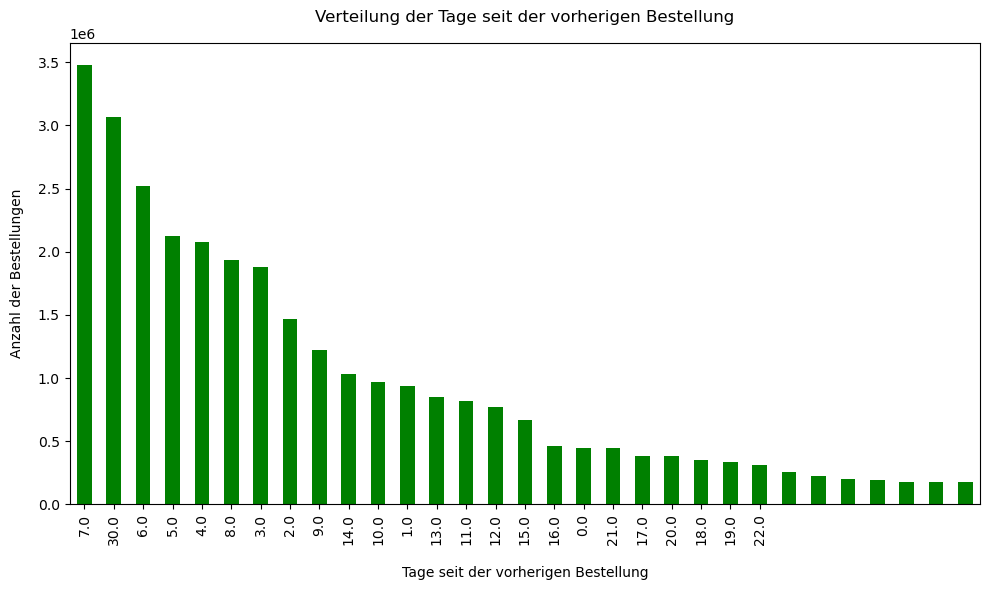

In [4]:
plt.figure(figsize=(10,6))
df_full['days_since_prior_order'].value_counts().plot.bar(color='green')

plt.title('Verteilung der Tage seit der vorherigen Bestellung', pad=15)
plt.xlabel('Tage seit der vorherigen Bestellung', labelpad=15) 
plt.ylabel('Anzahl der Bestellungen', labelpad=10)             

plt.xticks(range(0,24))
plt.tight_layout()
plt.savefig(os.path.join(plots_path, "bar_days_since_prior_order.png"))
plt.show()

Das Balkendiagramm zeigt, wie viele Bestellungen bei Instacart nach einer bestimmten Anzahl von Tagen seit der vorherigen Bestellung aufgegeben werden. Die meisten Bestellungen erfolgen innerhalb weniger Tage, während längere Pausen zwischen den Einkäufen deutlich seltener sind.

## 3. Histogramm der Spalte order_hour_of_day

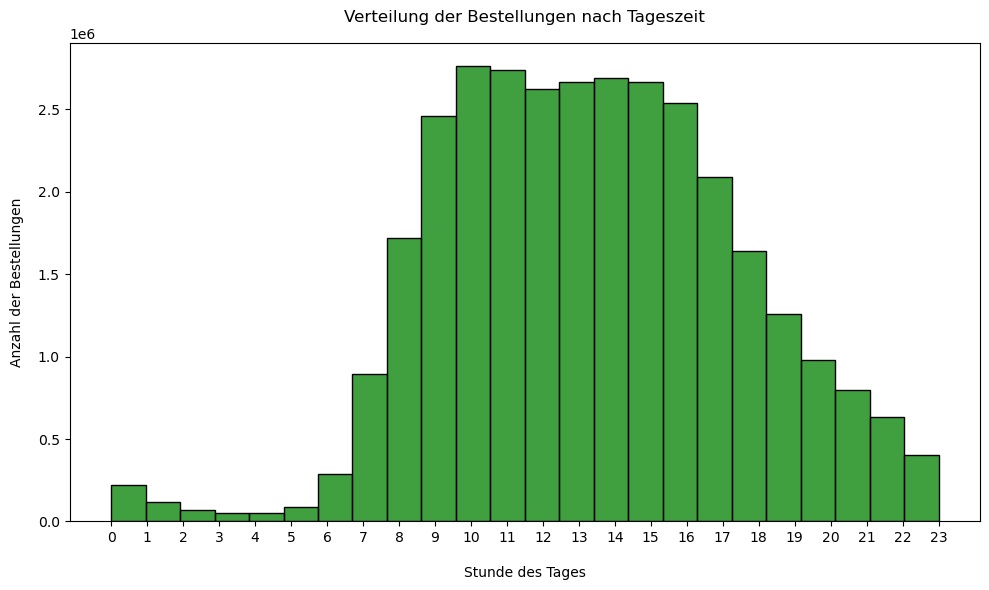

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df_full['order_hour_of_day'], bins=24, kde=False, color='green')
plt.title('Verteilung der Bestellungen nach Tageszeit', pad=15)
plt.xlabel('Stunde des Tages', labelpad=15)  
plt.ylabel('Anzahl der Bestellungen', labelpad=10)
plt.xticks(range(0,24))
plt.tight_layout()
plt.savefig(os.path.join(plots_path, "hist_order_hour_of_day.png"))
plt.show()

Das Histogramm zeigt, zu welchen Tageszeiten die meisten Bestellungen bei Instacart aufgegeben werden. 
Man erkennt Spitzen am Vormittag und Abend, während nachts nur wenige Bestellungen getätigt werden.

## 4. Balkendiagramm der Kundentreue loyalty_flag

In [6]:
# Loyalitätsflag erstellen
df_full['loyalty_flag'] = df_full.groupby('user_id')['order_number'] \
    .transform(lambda x: 'loyal customer' if x.max() > 40 
                                else ('regular customer' if x.max() > 10 else 'new customer'))

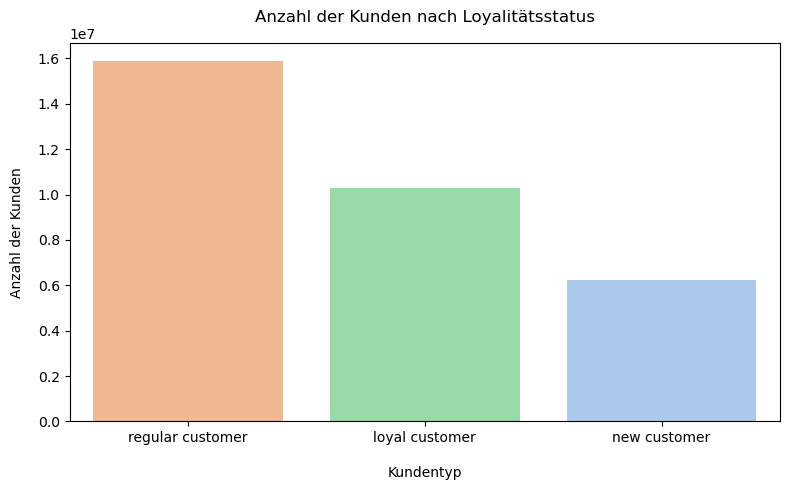

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='loyalty_flag', data=df_full,  hue='loyalty_flag', palette='pastel', legend=False, order=df_full['loyalty_flag'].value_counts().index)
plt.title('Anzahl der Kunden nach Loyalitätsstatus', pad=15)
plt.xlabel('Kundentyp', labelpad=15)
plt.ylabel('Anzahl der Kunden', labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(plots_path, "bar_loyalty_flag.png"))
plt.show()

## 5. Liniendiagramm der Ausgaben (product_price) nach Tageszeit

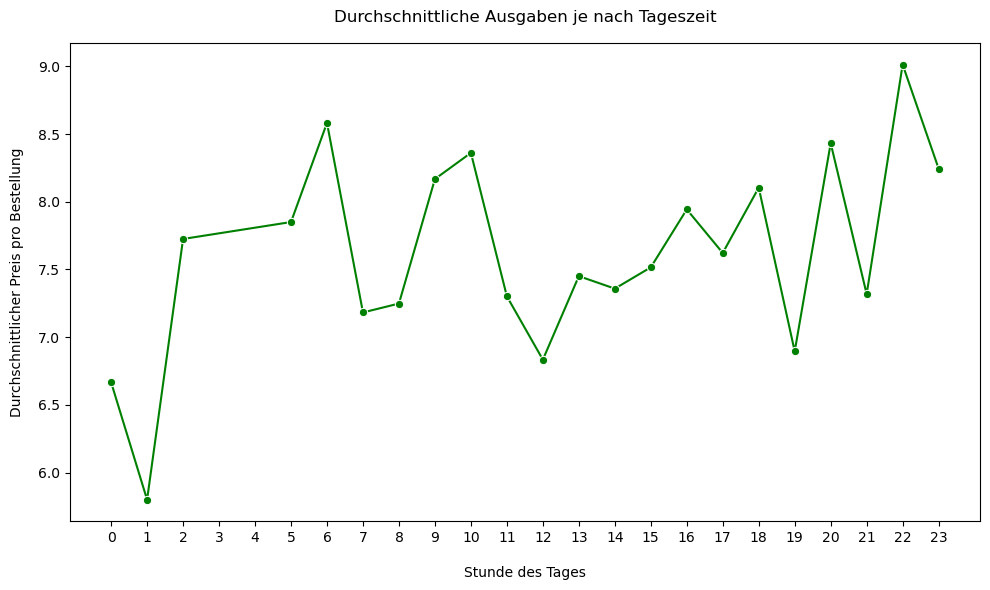

In [8]:
# Stichprobe von 1000 Bestellungen für das Liniendiagramm
sample_df = df_full.sample(n=1000, random_state=42)

plt.figure(figsize=(10,6))
sns.lineplot(x='order_hour_of_day', y='prices', data=sample_df, estimator='mean', errorbar=None, color='green', marker='o')
plt.title('Durchschnittliche Ausgaben je nach Tageszeit', pad=15)
plt.xlabel('Stunde des Tages', labelpad=15)
plt.ylabel('Durchschnittlicher Preis pro Bestellung', labelpad=10)
plt.xticks(range(0,24))
plt.tight_layout()
plt.savefig(os.path.join(plots_path, "line_avg_price_by_hour.png"))
plt.show()

Das Liniendiagramm zeigt, wie sich die durchschnittlichen Ausgaben pro Bestellung über den Tag verteilen. 
Es ist erkennbar, dass zu bestimmten Tageszeiten tendenziell teurere oder günstigere Produkte gekauft werden.

## 6. Liniendiagramm Alter vs. Anzahl der abhängigen Personen

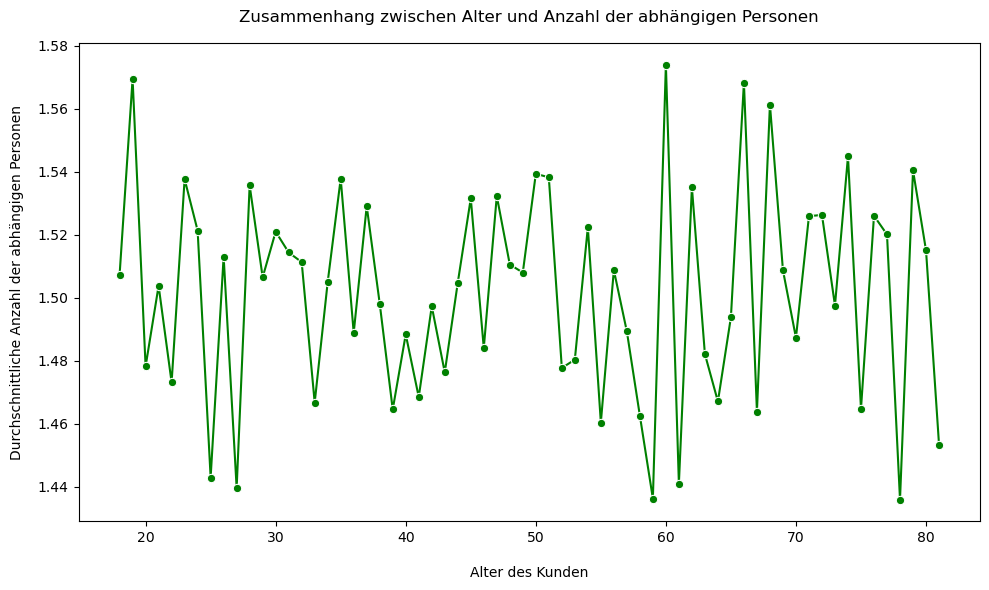

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='dependants', data=df_full, estimator='mean', errorbar=None, marker='o', color='green')
plt.title('Zusammenhang zwischen Alter und Anzahl der abhängigen Personen', pad=15)
plt.xlabel('Alter des Kunden', labelpad=15)
plt.ylabel('Durchschnittliche Anzahl der abhängigen Personen', labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(plots_path, "line_age_dependents.png"))
plt.show()

Das Diagramm zeigt, wie die Anzahl der abhängigen Personen im Durchschnitt mit dem Alter der Kunden zusammenhängt. 
Es ist zu erkennen, dass mittlere Altersgruppen tendenziell mehr abhängige Personen haben.

## 7. Streudiagramm Alter vs. Einkommen

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='income', data=df_full, alpha=0.5, color='green')
plt.title('Zusammenhang zwischen Alter und Kaufkraft', pad=15)
plt.xlabel('Alter des Kunden', labelpad=15)
plt.ylabel('Einkommen', labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(plots_path, "scatter_age_income.png"))
plt.show()

Das Streudiagramm zeigt die Beziehung zwischen Alter und Einkommen. 
Es ist erkennbar, wie sich die Kaufkraft über verschiedene Altersgruppen verteilt, mit einigen Ausreißern bei sehr hohem Einkommen.